# EM-DAT natural disasters dataset exploration, cleaning, processing and visualization
<br/>

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [331]:
plt.rcParams["figure.figsize"] = (10, 8)

In [332]:
df = pd.read_excel("data/emdat_public_2022_11_07_query_uid-dvxNk1.xlsx", header=6)
df.head()

/opt/homebrew/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,781207.0,3.200175,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     16457 non-null  object 
 1   Year                                       16457 non-null  int64  
 2   Seq                                        16457 non-null  int64  
 3   Glide                                      1703 non-null   object 
 4   Disaster Group                             16457 non-null  object 
 5   Disaster Subgroup                          16457 non-null  object 
 6   Disaster Type                              16457 non-null  object 
 7   Disaster Subtype                           13195 non-null  object 
 8   Disaster Subsubtype                        1103 non-null   object 
 9   Event Name                                 3962 non-null   object 
 10  Country               

In [334]:
df.shape

(16457, 50)

In [335]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

# Data Exploration - countries, disaster types and counts

In [336]:
df["Country"].value_counts()

United States of America (the)    1117
China                              994
India                              758
Philippines (the)                  679
Indonesia                          598
                                  ... 
United Arab Emirates (the)           1
Qatar                                1
Sint Maarten (Dutch part)            1
Saint Martin (French Part)           1
Bahrain                              1
Name: Country, Length: 228, dtype: int64

In [337]:
df["Disaster Type"].value_counts()

Flood                    5728
Storm                    4576
Earthquake               1576
Epidemic                 1519
Drought                   792
Landslide                 788
Extreme temperature       607
Wildfire                  453
Volcanic activity         269
Insect infestation         95
Mass movement (dry)        48
Glacial lake outburst       3
Fog                         1
Animal accident             1
Impact                      1
Name: Disaster Type, dtype: int64

In [338]:
df["Disaster Type"].isna().sum()

0

In [339]:
df["Disaster Type"].describe()

count     16457
unique       15
top       Flood
freq       5728
Name: Disaster Type, dtype: object

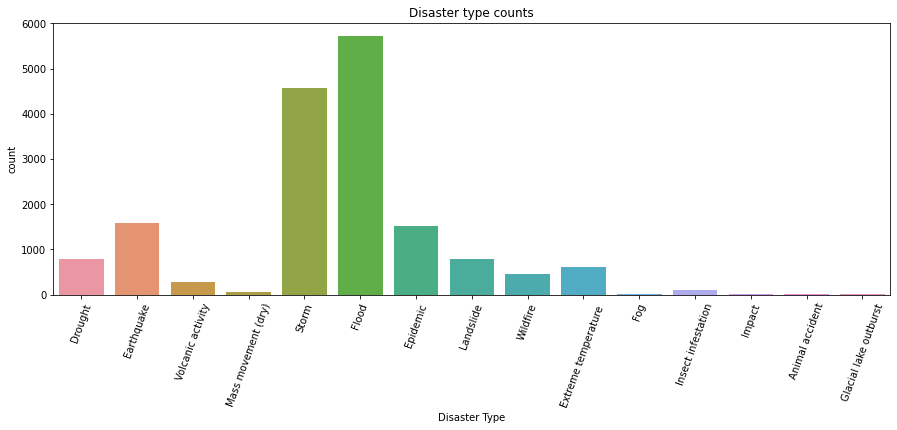

In [340]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x=df["Disaster Type"])
plt.xticks(rotation = 70)
plt.title("Disaster type counts")
plt.show()

# Data Cleaning

#### Pick out relevant columns


In [341]:
df_cols_reduced = df[[
    "Dis No", "Year", "Disaster Type", "Disaster Subtype", "Country", "ISO", "Region", "Continent",
    "Start Year", "Start Month", "End Year", "End Month",
    "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected"
]]

df_cols_reduced.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,4.0,1902,4.0,2000.0,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,4.0,1902,4.0,1000.0,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,10.0,1902,10.0,6000.0,NaN,NaN,NaN,NaN


#### Check for missing values (most importantly whether there are any in the columns we will use for visualizationi.e Country, ISO, and Disaster Type)   ---> Conclusion: the most important columns have no missing values

In [342]:
df_cols_reduced.isna().sum()

Dis No                  0
Year                    0
Disaster Type           0
Disaster Subtype     3262
Country                 0
ISO                     0
Region                  0
Continent               0
Start Year              0
Start Month           389
End Year                0
End Month             702
Total Deaths         4738
No Injured          12385
No Affected          6918
No Homeless         14000
Total Affected       4473
dtype: int64

#### Exclude rows disasters that are not directly climate-related

In [343]:
climate_related_disasters = ["Extreme temperature", "Flood", "Storm", "Drought", "Wildfire", "Glacial lake outburst"]
df_rows_reduced = df_cols_reduced[df_cols_reduced["Disaster Type"].isin(climate_related_disasters)]
df_rows_reduced.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
7,1904-0003-BGD,1904,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,1904,11.0,1904,11.0,NaN,NaN,NaN,NaN,NaN
12,1906-0023-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,5.0,1906,5.0,6.0,NaN,NaN,NaN,NaN
13,1906-0024-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,4.0,1906,4.0,NaN,NaN,NaN,NaN,NaN


#### Create the cleaned version of dataframe to be used for processing, analysis and visualization

In [344]:
cleaned_df = df_rows_reduced
cleaned_df.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
7,1904-0003-BGD,1904,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,1904,11.0,1904,11.0,NaN,NaN,NaN,NaN,NaN
12,1906-0023-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,5.0,1906,5.0,6.0,NaN,NaN,NaN,NaN
13,1906-0024-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,4.0,1906,4.0,NaN,NaN,NaN,NaN,NaN


#### Extract a subset of the dataset to use for visualization (from the year 2000 to 2021)

In [345]:
chosen_years = [
    2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
    2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
]
cleaned_df_subset = cleaned_df[cleaned_df["Year"].isin(chosen_years)]
cleaned_df_subset.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
6451,2000-0372-CHN,2000,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,2000,6.0,2000,6.0,43.0,10.0,NaN,31000.0,31010.0
6452,2000-9186-AFG,2000,Drought,Drought,Afghanistan,AFG,Southern Asia,Asia,2000,5.0,2002,NaN,37.0,NaN,2580000.0,NaN,2580000.0
6453,2000-0373-BGD,2000,Flood,Flash flood,Bangladesh,BGD,Southern Asia,Asia,2000,6.0,2000,6.0,11.0,50.0,200000.0,NaN,200050.0
6454,2000-0905-BOL,2000,Flood,NaN,Bolivia (Plurinational State of),BOL,South America,Americas,2000,2.0,2000,2.0,30.0,10.0,NaN,NaN,10.0
6455,2000-0019-BRA,2000,Flood,Riverine flood,Brazil,BRA,South America,Americas,2000,1.0,2000,1.0,26.0,NaN,NaN,70000.0,70000.0


# Data processing & visualization - Method 1 - Disaster frequency (all climate-related disasters)

In [346]:
disaster_counts_df = cleaned_df_subset.groupby(["Country", "ISO", "Continent"], sort=False).count()
disaster_counts_df.head()

,,,Dis No,Year,Disaster Type,Disaster Subtype,Region,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
Country,ISO,Continent,,,,,,,,,,,,,,
China,CHN,Asia,436,436,436,368,436,436,436,436,426,354,108,319,80,388
Afghanistan,AFG,Asia,92,92,92,79,92,92,92,92,90,77,27,51,25,68
Bangladesh,BGD,Asia,105,105,105,83,105,105,105,105,105,93,48,64,21,92
Bolivia (Plurinational State of),BOL,Americas,48,48,48,34,48,48,48,48,45,29,10,44,2,47
Brazil,BRA,Americas,104,104,104,81,104,104,104,104,100,83,25,75,24,96


In [347]:
disaster_counts_df.reset_index(inplace=True)
disaster_counts_df.head()

,Country,ISO,Continent,Dis No,Year,Disaster Type,Disaster Subtype,Region,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,China,CHN,Asia,436,436,436,368,436,436,436,436,426,354,108,319,80,388
1,Afghanistan,AFG,Asia,92,92,92,79,92,92,92,92,90,77,27,51,25,68
2,Bangladesh,BGD,Asia,105,105,105,83,105,105,105,105,105,93,48,64,21,92
3,Bolivia (Plurinational State of),BOL,Americas,48,48,48,34,48,48,48,48,45,29,10,44,2,47
4,Brazil,BRA,Americas,104,104,104,81,104,104,104,104,100,83,25,75,24,96


In [348]:
disaster_counts_df = disaster_counts_df[["Country", "ISO", "Dis No", "Continent"]]
disaster_counts_df.head()

,Country,ISO,Dis No,Continent
0,China,CHN,436,Asia
1,Afghanistan,AFG,92,Asia
2,Bangladesh,BGD,105,Asia
3,Bolivia (Plurinational State of),BOL,48,Americas
4,Brazil,BRA,104,Americas


In [349]:
disaster_counts_df.rename(columns={"Dis No": "Disaster count"}, inplace=True)
disaster_counts_df.head()

,Country,ISO,Disaster count,Continent
0,China,CHN,436,Asia
1,Afghanistan,AFG,92,Asia
2,Bangladesh,BGD,105,Asia
3,Bolivia (Plurinational State of),BOL,48,Americas
4,Brazil,BRA,104,Americas


#### Create a csv file of the disaster_counts df that will be merged with emissions data for the final visualization

In [350]:
disaster_counts_df.to_csv("data/emdat_disaster_counts_2000_2021.csv")

#### Choropleth map of disaster counts

In [352]:
fig = go.Figure(data=go.Choropleth(
    locations = disaster_counts_df["ISO"],
    z = disaster_counts_df["Disaster count"],
    text = disaster_counts_df["Country"],
    colorscale = "sunset",
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title = "Climate-related disaster frequency <br>(2000-2021)<br>",
))

fig.update_layout(
    title_text="Climate-related disaster frequency (2000-2021)",
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig.show()

# Data processing & visualization - Method 2 - Disaster comparison scale (Fire vs Flood)

**Note**: Thie method did not end up getting used in the final report

### Data processing

#### Remove rows with disasters that are not relevant to our Fire vs Flood visualization (i.e anything other than Flood, Wildfire and Drought)

In [147]:
relevant_disasters = ["Flood", "Drought", "Wildfire"]
cleaned_df_2 = cleaned_df_subset[cleaned_df_subset["Disaster Type"].isin(relevant_disasters)]

#### Count the number of disasters by country

In [153]:
# First trying this on just 2021, as a test
chosen_years_2 = [2021]
cleaned_df_subset_2 = cleaned_df_2[cleaned_df_2["Year"].isin(chosen_years_2)]
cleaned_df_subset_2.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
15033,2021-0411-AUT,2021,Flood,NaN,Austria,AUT,Western Europe,Europe,2021,7.0,2021,7.0,1.0,NaN,NaN,NaN,NaN
15034,2021-0455-BGD,2021,Flood,NaN,Bangladesh,BGD,Southern Asia,Asia,2021,7.0,2021,8.0,21.0,NaN,268744.0,NaN,268744.0
15035,2021-0725-BIH,2021,Flood,Flash flood,Bosnia and Herzegovina,BIH,Southern Europe,Europe,2021,11.0,2021,11.0,NaN,NaN,250000.0,NaN,250000.0
15036,2021-0332-BRA,2021,Flood,Flash flood,Brazil,BRA,South America,Americas,2021,6.0,2021,6.0,2.0,NaN,2400.0,NaN,2400.0
15037,2021-0040-BRA,2021,Flood,NaN,Brazil,BRA,South America,Americas,2021,1.0,2021,1.0,2.0,2.0,105.0,NaN,107.0


In [154]:
cleaned_df_subset_2["Year"].value_counts()

2021    259
Name: Year, dtype: int64

#### Introducing an idea we came up with: a comparison scale for disasters to allow us compare floods vs drought & wildfires 
Floods are marked with -1 while drought & wildfires are marked with +1. Later, when each country's data is summed up, it will allow us to see, at a glance, whether floods or drought & wildfires are more prevalent in a country in a given year

In [155]:
# Trying out the use of a scale: -1 for Flood and 1 for Wildfire/Drought
cleaned_df_subset_2["Disaster Comparison Scale"] = cleaned_df_subset_2["Disaster Type"].apply(lambda x: -1 if x=="Flood" else 1)
cleaned_df_subset_2.head()

/var/folders/32/t8k4f_4d55nds458_sr5k_d80000gn/T/ipykernel_16988/2080101570.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Disaster Comparison Scale
15033,2021-0411-AUT,2021,Flood,NaN,Austria,AUT,Western Europe,Europe,2021,7.0,2021,7.0,1.0,NaN,NaN,NaN,NaN,-1
15034,2021-0455-BGD,2021,Flood,NaN,Bangladesh,BGD,Southern Asia,Asia,2021,7.0,2021,8.0,21.0,NaN,268744.0,NaN,268744.0,-1
15035,2021-0725-BIH,2021,Flood,Flash flood,Bosnia and Herzegovina,BIH,Southern Europe,Europe,2021,11.0,2021,11.0,NaN,NaN,250000.0,NaN,250000.0,-1
15036,2021-0332-BRA,2021,Flood,Flash flood,Brazil,BRA,South America,Americas,2021,6.0,2021,6.0,2.0,NaN,2400.0,NaN,2400.0,-1
15037,2021-0040-BRA,2021,Flood,NaN,Brazil,BRA,South America,Americas,2021,1.0,2021,1.0,2.0,2.0,105.0,NaN,107.0,-1


#### Grouping data by country

In [156]:
group_by_object = cleaned_df_subset_2.groupby(["Country"], sort=False)
group_by_object

In [157]:
aggregated_df = group_by_object.agg("sum")
aggregated_df

,Year,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Disaster Comparison Scale
Country,,,,,,,,,,,
Austria,2021,2021,7.0,2021,7.0,1.0,0.0,0.0,0.0,0.0,-1
Bangladesh,2021,2021,7.0,2021,8.0,21.0,0.0,268744.0,0.0,268744.0,-1
Bosnia and Herzegovina,2021,2021,11.0,2021,11.0,0.0,0.0,250000.0,0.0,250000.0,-1
Brazil,18189,18189,35.0,18190,38.0,62.0,533.0,1607517.0,0.0,1608050.0,-7
Bhutan,2021,2021,6.0,2021,6.0,10.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
Chad,2021,2021,6.0,2021,8.0,32.0,329.0,246851.0,22000.0,269180.0,-1
Tuvalu,2021,2021,1.0,2021,6.0,0.0,0.0,10204.0,0.0,10204.0,1
"Tanzania, United Republic of",4042,4042,12.0,4043,5.0,1.0,0.0,499000.0,0.0,499000.0,0


In [158]:
aggregated_df.loc["Indonesia"]["Disaster Comparison Scale"]

-18.0

Testing on a random country:

In [160]:
country = "Indonesia"
country_data = group_by_object.get_group(country)["Disaster Type"].value_counts()
print(country_data)

Flood    18
Name: Disaster Type, dtype: int64


In [164]:
len(cleaned_df_subset_2[cleaned_df_subset_2["Country"] == "Indonesia"])

18

#### Extract the disaster comparison scale

In [165]:
comparison_scale = aggregated_df["Disaster Comparison Scale"]
comparison_scale

Country
Austria                        -1
Bangladesh                     -1
Bosnia and Herzegovina         -1
Brazil                         -7
Bhutan                         -1
                               ..
Chad                           -1
Tuvalu                          1
Tanzania, United Republic of    0
Yemen                          -2
Serbia                         -1
Name: Disaster Comparison Scale, Length: 101, dtype: int64

In [166]:
comparison_scale.value_counts()

-1     45
 0     14
-2     12
 1      8
-3      8
-4      3
-5      3
-7      2
-8      2
-6      1
-9      1
-10     1
-18     1
Name: Disaster Comparison Scale, dtype: int64

In [167]:
comparison_scale_dict = comparison_scale.to_dict()

#### It seems that most countries have more floods than drought/wildfires. Extracting the countries that have more drought/wildfires to see which ones they are

In [168]:
aggregated_df[aggregated_df["Disaster Comparison Scale"] > 0]["Disaster Comparison Scale"]

Country
Cyprus                                         1
Greece                                         1
Kazakhstan                                     1
Macedonia (the former Yugoslav Republic of)    1
Honduras                                       1
Zambia                                         1
Zimbabwe                                       1
Tuvalu                                         1
Name: Disaster Comparison Scale, dtype: int64

### Visualization

#### Add comparison scale values back to "reduced" dataset in order to visualize them on a map

In [169]:
cleaned_df_subset_2["Final Disaster Comparison Scale"] = df["Country"].map(comparison_scale_dict)
cleaned_df_subset_2.head(10)

/var/folders/32/t8k4f_4d55nds458_sr5k_d80000gn/T/ipykernel_16988/67076709.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Disaster Comparison Scale,Final Disaster Comparison Scale
15033,2021-0411-AUT,2021,Flood,NaN,Austria,AUT,Western Europe,Europe,2021,7.0,2021,7.0,1.0,NaN,NaN,NaN,NaN,-1,-1.0
15034,2021-0455-BGD,2021,Flood,NaN,Bangladesh,BGD,Southern Asia,Asia,2021,7.0,2021,8.0,21.0,NaN,268744.0,NaN,268744.0,-1,-1.0
15035,2021-0725-BIH,2021,Flood,Flash flood,Bosnia and Herzegovina,BIH,Southern Europe,Europe,2021,11.0,2021,11.0,NaN,NaN,250000.0,NaN,250000.0,-1,-1.0
15036,2021-0332-BRA,2021,Flood,Flash flood,Brazil,BRA,South America,Americas,2021,6.0,2021,6.0,2.0,NaN,2400.0,NaN,2400.0,-1,-7.0
15037,2021-0040-BRA,2021,Flood,NaN,Brazil,BRA,South America,Americas,2021,1.0,2021,1.0,2.0,2.0,105.0,NaN,107.0,-1,-7.0
15038,2021-0087-BRA,2021,Flood,NaN,Brazil,BRA,South America,Americas,2021,2.0,2021,2.0,6.0,NaN,100000.0,NaN,100000.0,-1,-7.0
15039,2021-0308-BTN,2021,Flood,Flash flood,Bhutan,BTN,Southern Asia,Asia,2021,6.0,2021,6.0,10.0,NaN,NaN,NaN,NaN,-1,-1.0
15040,2021-0741-CAN,2021,Flood,NaN,Canada,CAN,Northern America,Americas,2021,11.0,2021,11.0,4.0,NaN,15000.0,NaN,15000.0,-1,0.0
15041,2021-0392-CHL,2021,Flood,NaN,Chile,CHL,South America,Americas,2021,6.0,2021,6.0,NaN,10.0,600.0,NaN,610.0,-1,-1.0
15042,2021-0507-CHN,2021,Flood,NaN,China,CHN,Eastern Asia,Asia,2021,8.0,2021,8.0,21.0,NaN,286100.0,NaN,286100.0,-1,-3.0


#### Choropleth map

In [286]:
fig = go.Figure(data=go.Choropleth(
    locations=cleaned_df_subset_2["ISO"],
    z=cleaned_df_subset_2["Final Disaster Comparison Scale"],
    text=cleaned_df_subset_2["Country"],
    colorscale="rdbu",
    reversescale=True,
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title = "Wildfire/Drought vs Floods <br>(2022)",
))

fig.update_layout(
    title_text="Fire vs Flood: While some parts of the world burn, others drown",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular"
    )
)

fig.show()

# Data processing & visualization - Method 3 - Disaster frequency (separated into flood, drought and wildfire)

**Note**: Some visualizations in this section ended up being used in the final report as **exploratory** visualizations

### Data processing

#### Extract the country codes into a dict, for use when visualizing grouped data

In [252]:
country_codes = cleaned_df[["Country", "ISO"]]
country_codes.set_index("Country", inplace=True)
country_codes = country_codes.to_dict()["ISO"]
country_codes

{'Cabo Verde': 'CPV',
 'India': 'IND',
 'Bangladesh': 'BGD',
 'Belgium': 'BEL',
 'Hong Kong': 'HKG',
 'Haiti': 'HTI',
 'Burkina Faso': 'BFA',
 'Gambia (the)': 'GMB',
 'Guinea-Bissau': 'GNB',
 'Canada': 'CAN',
 'China': 'CHN',
 'Anguilla': 'AIA',
 'Germany Fed Rep': 'DFR',
 'Bahamas (the)': 'BHS',
 'Cuba': 'CUB',
 'Algeria': 'DZA',
 'Guadeloupe': 'GLP',
 'Dominica': 'DMA',
 'Dominican Republic (the)': 'DOM',
 'Greece': 'GRC',
 'Belize': 'BLZ',
 'Fiji': 'FJI',
 'Honduras': 'HND',
 'Australia': 'AUS',
 'Cook Islands (the)': 'COK',
 'Azores Islands': 'AZO',
 'Bermuda': 'BMU',
 'Brazil': 'BRA',
 'France': 'FRA',
 'Guatemala': 'GTM',
 'Antigua and Barbuda': 'ATG',
 'Ecuador': 'ECU',
 'Comoros (the)': 'COM',
 'United Kingdom of Great Britain and Northern Ireland (the)': 'GBR',
 'Spain': 'ESP',
 'Indonesia': 'IDN',
 'Netherlands Antilles': 'ANT',
 'Egypt': 'EGY',
 'Barbados': 'BRB',
 'Afghanistan': 'AFG',
 'Argentina': 'ARG',
 'Colombia': 'COL',
 'Guam': 'GUM',
 'Grenada': 'GRD',
 'Bolivia (Pl

#### Create a data frame with the country, ISO and years (each year as a column with the frequency of floods, fire & drought)

In [253]:
def create_frequency_df(df):
  data = []
  for k, v in country_codes.items():
    l = {
         "Country": k, 
         "ISO": v, 
         "flood_freq": len(df[(df["Country"] == k) & (df["Disaster Type"] == "Flood")]), 
         "drought_freq": len(df[(df["Country"] == k) & (df["Disaster Type"] == "Drought")]), 
         "fire_freq": len(df[(df["Country"] == k) & (df["Disaster Type"] == "Wildfire")])
        }
    data.append(l)
  frequency_df = pd.DataFrame.from_records(data)
  return frequency_df

### Subset: 2011-2021

In [254]:
chosen_years_recent = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cleaned_df_subset_3 = cleaned_df_subset[cleaned_df_subset["Year"].isin(chosen_years_recent)]
freq_df = create_frequency_df(cleaned_df_subset_3)
freq_df.sort_values(by=["flood_freq"], ascending=False, inplace=True)
freq_df.head(5)

,Country,ISO,flood_freq,drought_freq,fire_freq
35,Indonesia,IDN,112,1,2
10,China,CHN,103,7,2
1,India,IND,80,2,2
61,United States of America (the),USA,49,9,34
27,Brazil,BRA,48,4,1


#### Quick sanity check to see if the numbers match up with the original dataset (i.e no errors in calculation)

In [255]:
test_country = "Malaysia"
test_disaster_type = "Flood"

In [256]:
freq_df[freq_df["Country"] == test_country]

,Country,ISO,flood_freq,drought_freq,fire_freq
116,Malaysia,MYS,30,1,0


In [259]:
test = cleaned_df[(cleaned_df["Country"] == test_country) & (cleaned_df["Disaster Type"] == test_disaster_type) & (cleaned_df["Year"].isin(chosen_years_recent))]
test.shape

(30, 17)

### Visualization

#### Visualization of flood frequency

In [288]:
fig = go.Figure(data=go.Choropleth(
    locations=freq_df["ISO"],
    z=freq_df["flood_freq"],
    text=freq_df["Country"],
    colorscale="blues",
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title="Flood frequency<br>(2011-2021)<br>",
))

fig.update_layout(
    title_text="Flood frequency (2011-2021)",
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig.show()

#### Visualization of wildfire frequency 

In [271]:
fig = go.Figure(data=go.Choropleth(
    locations=freq_df["ISO"],
    z=freq_df["fire_freq"],
    text=freq_df["Country"],
    colorscale="oranges",
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title="Wildfire frequency<br>(2011-2021)<br>",
))

fig.update_layout(
    title_text="Wildfire frequency (2011-2021)",
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig.show()

### Subset: 2000-2010

In [263]:
chosen_years_past = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
cleaned_df_subset_3 = cleaned_df[cleaned_df["Year"].isin(chosen_years_past)]
freq_df_2 = create_frequency_df(cleaned_df_subset_3)
freq_df_2.head()

,Country,ISO,flood_freq,drought_freq,fire_freq
0,Cabo Verde,CPV,1,1,0
1,India,IND,105,3,0
2,Bangladesh,BGD,24,1,0
3,Belgium,BEL,7,0,0
4,Hong Kong,HKG,1,0,0


#### Visualization of flood frequency 

In [289]:
fig = go.Figure(data=go.Choropleth(
    locations=freq_df_2["ISO"],
    z=freq_df_2["flood_freq"],
    text=freq_df_2["Country"],
    colorscale="blues",
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title = "Flood frequency<br>(2000-2010)<br>",
))

fig.update_layout(
    title_text="Flood frequency (2000-2010)",
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig.show()

#### Visualization of wildfire frequency 

In [273]:
fig = go.Figure(data=go.Choropleth(
    locations = freq_df_2["ISO"],
    z = freq_df_2["fire_freq"],
    text = freq_df_2["Country"],
    colorscale = "oranges",
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title = "Wildfire frequency<br>(2000-2010)<br>",
))

fig.update_layout(
    title_text="Wildfire frequency (2000-2010)",
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig.show()